# Outlook

In this colab we explain the [NoAutoResetGymAgent](https://github.com/osigaud/bbrl/blob/96e58f6e01065f6a551039c4b9f7c1036b5523e6/bbrl/agents/gyma.py#L331) class in BBRL. This colab mainly contains text and figures for explanations, it contains crucial informations to understand the inner working of BBRL.

## The NoAutoResetGymAgent

In BBRL, GymAgents can run several environments in parallel. But when using a NoAutoResetGymAgent, a stopped environment is not restarted until the other ones have all finished. That makes it easier to understand than the AutoResetGymAgent, which is explained [in this notebook](https://colab.research.google.com/drive/1W9Y-3fa6LsPeR6cBC1vgwBjKfgMwZvP5?usp=sharing).

So, instead of specifying a number of time steps, the NoAutoResetGymAgent can be used in conjunction with a `stop variable`: data collection stops as soon as the `stop variable` is True for all environments. The standard use case consists in using "env/done" as `stop variable`.

Here an example of code used for evaluation of agents along training.

In [ ]:
eval_workspace = Workspace()  # Used for evaluation
eval_agent(eval_workspace, t=0, stop_variable="env/done", choose_action=True)
rewards = eval_workspace["env/cumulated_reward"][-1]
mean = rewards.mean()
logger.add_log("reward", mean, nb_steps)

A specificity of the NoAutoResetGymAgent in SaLinA is that once an environment is stopped, if other environments have not finished the data from the last step of the environment is copied into the collected data for the next time steps until the end. This is illustrated below.

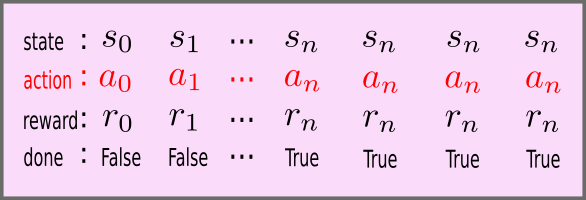

As shown below, this facilitates checking if all environments are done and getting the cumulated reward for each just by looking into the last time step.

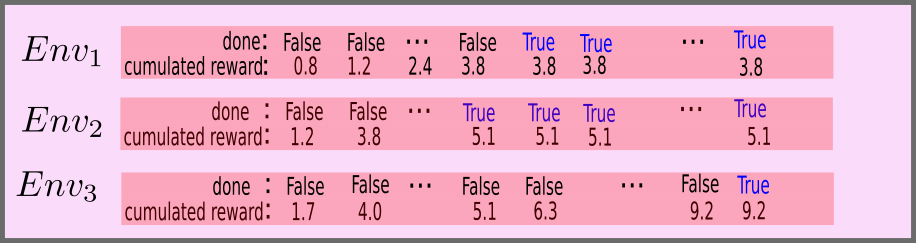

There is an elementary example of this behavior in [this notebook](https://colab.research.google.com/drive/1Ui481r47fNHCQsQfKwdoNEVrEiqAEokh?usp=sharing), where you can see that indeed information is copied until the end of the episodes from all environments.

## What's next?

In [this notebook](https://colab.research.google.com/drive/1yAQlrShysj4Q9EBpYM8pBsp2aXInhP7x?usp=sharing), we leverage all the above information to write a first simple implementation of the A2C algorithm.

In [this other notebook](https://colab.research.google.com/drive/1H9_gkenmb_APnbygme1oEdhqMLSDc_bM?usp=sharing), we do the same for DQN.